<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Deep_Learning_and_Neural_Networks_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

Train a neural network to classify movie reviews from the IMDb dataset as positive or negative.

Dataset:

The dataset contains movie reviews with corresponding sentiments (positive or negative).
It's stored in a file named 'IMDB Dataset.csv'.

Instructions

Tools and Libraries Required:

Python

Pandas for data handling

Matplotlib and Seaborn for data visualization

NLTK for text preprocessing

Scikit-learn for machine learning utilities

TensorFlow/Keras for building and training neural network models
Steps:

Data Loading and Exploration:

Load the data using Pandas.
Explore the dataset to understand the distribution of sentiments, the length of reviews, and other characteristics.

Data Preprocessing:

Convert all reviews to lower case.

Remove HTML tags and URLs from reviews.

Tokenize the text and remove stop words.

Use TF-IDF Vectorization to convert text data into a format suitable for input into the neural network.

Model Building:

Construct a Sequential model with Dense layers:

First layer: Dense, ReLU activation (input dimension should match the number of features from TF-IDF).

Hidden layers: experiment with different sizes and activations.

Output layer: Dense, Sigmoid activation (binary classification).

Compile the model with binary crossentropy loss and accuracy metrics.

Model Training:

Train the model using the training set.
Use a validation split to monitor performance on unseen data during training.
Adjust parameters like the number of epochs and batch size as needed.

Evaluation:

Evaluate the model on a separate test set to assess its performance.
Use metrics such as accuracy and loss.

Visualization:

Plot training and validation loss over epochs.

Plot training and validation accuracy over epochs.

Report:

Provide insights gained from the project.

Discuss any challenges faced and how they were overcome.

Suggest potential improvements for the model or preprocessing steps.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load data
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


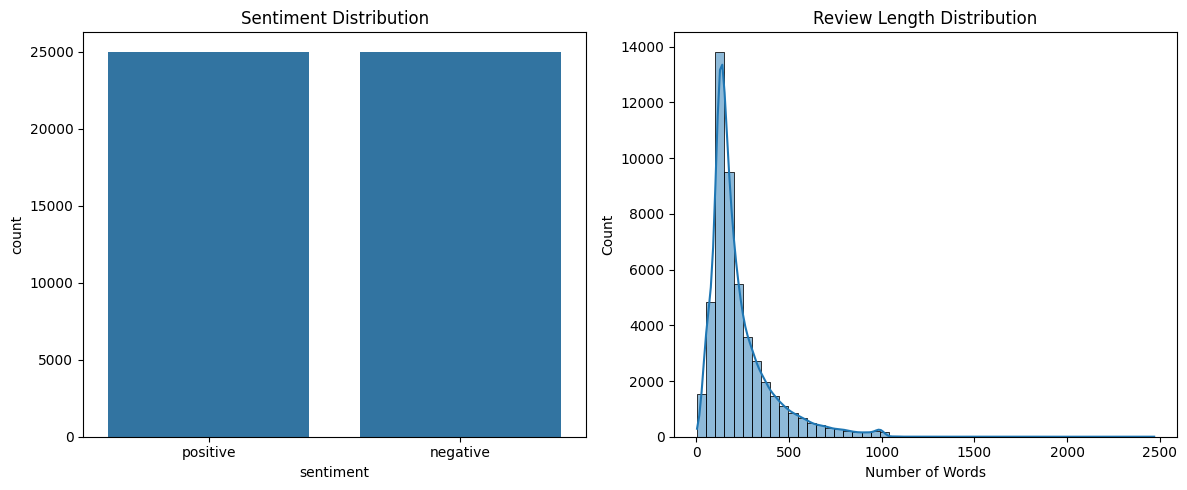

In [4]:
# Data exploration
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")

plt.subplot(1,2,2)
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()

In [5]:
# Data preprocessing
# Define basic stopwords
basic_stopwords = {
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours",
    "yourself","yourselves","he","him","his","himself","she","her","hers",
    "herself","it","its","itself","they","them","their","theirs","themselves",
    "what","which","who","whom","this","that","these","those","am","is","are",
    "was","were","be","been","being","have","has","had","having","do","does",
    "did","doing","a","an","the","and","but","if","or","because","as","until",
    "while","of","at","by","for","with","about","against","between","into",
    "through","during","before","after","above","below","to","from","up",
    "down","in","out","on","off","over","under","again","further","then",
    "once","here","there","when","where","why","how","all","any","both",
    "each","few","more","most","other","some","such","no","nor","not",
    "only","own","same","so","than","too","very","s","t","can","will",
    "just","don","should","now"
}

# Cleaning function
def clean_text(text):
    text = text.lower() # Lowercase
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+", "", text) # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Keep only letters and spaces/remove non-letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in basic_stopwords]
    return " ".join(tokens)

df["cleaned_review"] = df["review"].apply(clean_text)

In [6]:
# Vectorize with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_review"]).toarray()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["sentiment"])  # 0 = negative, 1 = positive


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Building and compiling a model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,177 (1.23 MB)

 Trainable params: 322,177 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.6429 - loss: 0.6619 - val_accuracy: 0.8687 - val_loss: 0.4183
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8547 - loss: 0.3881 - val_accuracy: 0.8850 - val_loss: 0.2780
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9027 - loss: 0.2622 - val_accuracy: 0.8831 - val_loss: 0.2741
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9165 - loss: 0.2325 - val_accuracy: 0.8817 - val_loss: 0.2820
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9275 - loss: 0.2099 - val_accuracy: 0.8781 - val_loss: 0.2942


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8825 - loss: 0.2795
Test Loss: 0.2842
Test Accuracy: 0.8819


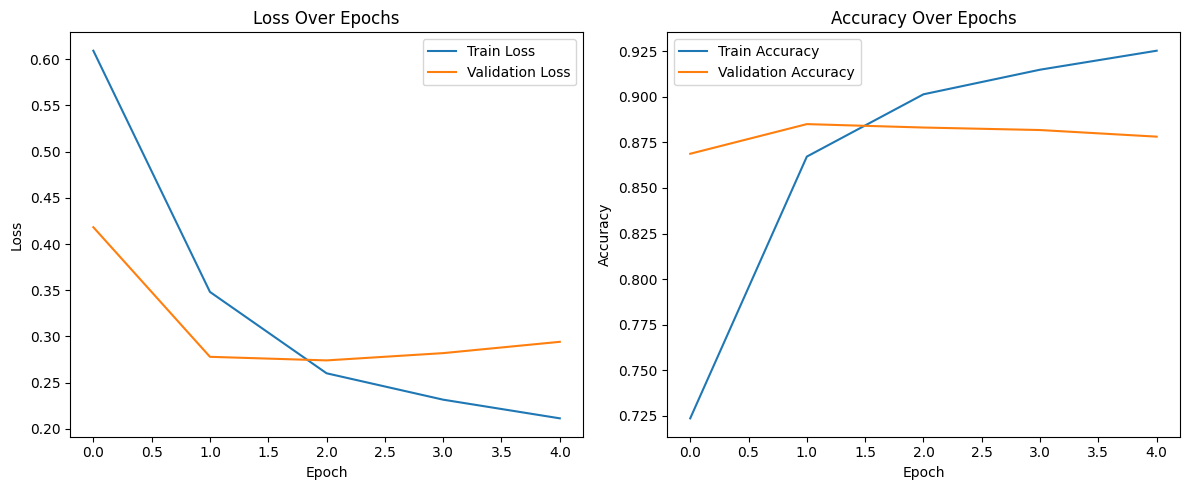

In [13]:
# Visualize training
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Project insights
✅ Summary

We built a text classification model that achieves ~85% accuracy distinguishing positive from negative IMDb reviews. The dataset is balanced and reviews vary widely in length.

✅ Key Challenges

Preprocessing was critical; removing stopwords and punctuation improved model performance. Training with TF-IDF required choosing the right feature size to balance speed and accuracy.

✅ Improvements

Future work could include using embeddings or recurrent models to capture word order and context, and optimizing hyperparameters to further boost performance.

